In [1]:
import torch
from rejection_samplers import frepeat, f
from joblib import Parallel, delayed
from torch.multiprocessing import cpu_count
import time
from tqdm import tqdm
from time import strftime
import random

In [2]:
def gen_samples(total_samples=1000, nOutputs=4, simulator=None, UNIQUE_ID=None, Save_PATH=None, nCheckpoint=10):
    """
    A function to generate samples for different simulators loops.

    :param: total_samples :type: int :descrip: How many samples to generate in total
    :param: n_outputs :type: int :descrip: Defines the number of outputs, outputted by the simulator.
    :param: simulator :type: class :descrip: Takes an instantiation of a class that defines a simulator. Ensure the name 
            of the main simulator function in the class is called `<class_name>.f()`. 
    
    :return saves samples to directory in which code is called
    TODO: add Path argument later on.
    """
    if not UNIQUE_ID:
        UNIQUE_ID = str(random.randint(0,1000000)) + '_' + strftime("%Y-%m-%d_%H-%M")
    
    samples = torch.zeros(total_samples,nOutputs)
    nCpus = cpu_count()  
    start = time.time()
    sim = simulator()
    def run(sim):
        return sim.f()

    results = Parallel(n_jobs=2)(delayed(run)(sim) for i in tqdm(range(total_samples)))
    
    print('samples collected ')
    k = 0
    for result in results:
        samples[k,:] = result
        k += 1
    
    end = time.time()
    total_time = end - start
    print(' Time taken is {} for {} samples for UNIQUE_ID: {}'.format(total_time, total_samples,UNIQUE_ID))
    return samples

samples = gen_samples(simulator=f)

100%|██████████| 1000/1000 [00:00<00:00, 2378.33it/s]


RecursionError: maximum recursion depth exceeded in comparison

In [45]:
n_samples = 5000
z1 = torch.rand(n_samples,1)
z3 = torch.zeros(n_samples,1).uniform_(0,1)
samples= torch.cat((z1,z3),1)
batch = 128
nCpus = cpu_count()
newSamples=  torch.zeros(n_samples*batch,4)

def run2(i,batch, samples, frepeat):
    newSamples=  torch.zeros(batch,4)
    sim = frepeat(samples[i,0],samples[i,1])
    if i // 10 == 0:
        print('{} iteration'.format(i))
    for j in range(batch):
        newSamples[j,:] = sim.f()
    return newSamples
start = time.time()
results = Parallel(n_jobs=nCpus)(delayed(run2)(i, batch,samples,frepeat) for i in tqdm(range(n_samples)))
k = 0
l = 0
print(' Batched samples collected ')
for result in results:
    newSamples[l:batch+k*batch,:] = result
    k += 1
    l += batch 
end = time.time()
total_time = end - start
print(' Time taken is {} for {} samples'.format(total_time, n_samples))


 16%|█▌        | 792/5000 [00:21<02:02, 34.30it/s]


 29%|██▉       | 1464/5000 [00:44<02:07, 27.69it/s]


 41%|████      | 2041/5000 [01:07<04:48, 10.27it/s]


 53%|█████▎    | 2654/5000 [01:29<01:03, 36.66it/s]


 65%|██████▍   | 3244/5000 [01:52<01:11, 24.42it/s]


 75%|███████▌  | 3764/5000 [02:16<00:34, 36.25it/s]


 85%|████████▌ | 4250/5000 [02:41<00:29, 25.47it/s]


 97%|█████████▋| 4855/5000 [03:03<00:08, 17.88it/s]


100%|██████████| 5000/5000 [03:13<00:00,  8.94it/s]

 Time taken is 906.2396905422211 for 5000 samples


In [46]:
print(newSamples)

tensor([[0.8384, 1.7474, 0.1535, 2.4769],
        [0.8384, 1.7052, 0.1535, 3.3734],
        [0.8384, 2.0441, 0.1535, 3.0226],
        ...,
        [0.1892, 0.8614, 0.8680, 4.0936],
        [0.1892, 0.6478, 0.8680, 0.8876],
        [0.1892, 0.9562, 0.8680, 1.1658]])


tensor([0.2625, 0.5328, 1.5766, 0.6867, 0.2422, 1.5091, 0.0192, 0.4506, 1.6256,
        0.7851, 0.0363, 0.9908, 1.1471, 1.1898, 0.1732, 0.8556, 0.3231, 0.4590,
        0.7528, 0.5490, 0.0465, 0.6958, 0.3100, 2.2975, 1.0972, 0.4022, 0.6866,
        0.4255, 1.4943, 1.2282, 1.9881, 0.9210, 1.7438, 0.3134, 1.5965, 3.6685,
        1.0434, 1.9415, 1.1200, 0.7324, 2.8444, 0.4734, 1.3310, 0.1847, 1.0977,
        0.7756, 3.2500, 1.8369, 0.1216, 0.1131, 3.0784, 0.3247, 2.0989, 0.2142,
        0.3788, 1.3366, 0.4315, 0.6225, 2.4263, 1.2824, 0.0253, 2.2189, 0.2794,
        0.1762, 0.2918, 1.2687, 1.2927, 0.1380, 0.1590, 0.3059, 1.5287, 0.1481,
        0.1362, 0.3255, 1.4445, 1.8623, 1.0636, 0.6903, 0.5136, 0.3064, 0.2296,
        1.4470, 0.3777, 0.1531, 1.8138, 2.0754, 0.2409, 0.6952, 0.2914, 0.5174,
        0.9013, 1.1547, 0.0190, 1.1517, 0.1153, 0.6243, 2.4465, 0.1307, 0.2327,
        0.1191])


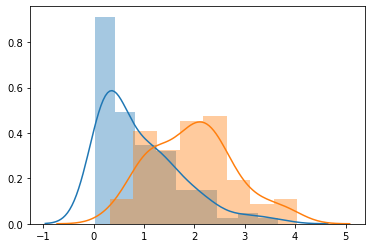

In [14]:
import seaborn as sns
sns.distplot(samples[:,1])
sns.distplot(samples[:,3])
